In [2]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from porousmedialab.batch import Batch
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
tend = 40 * 24 * 60 * 60
dt = 1 * 24 * 60 * 60

In [4]:
bl = Batch(tend, dt)

Simulation started:
	 2018-04-18 10:24:26
Simulation started:
	 2018-04-18 10:24:26
Simulation started:
	 2018-04-18 10:24:26
Simulation started:
	 2018-04-18 10:24:26


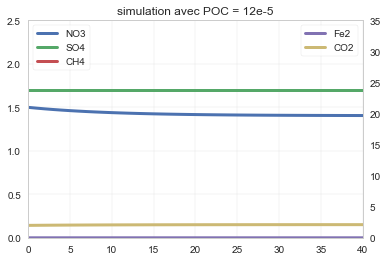

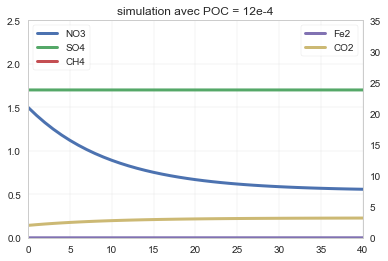

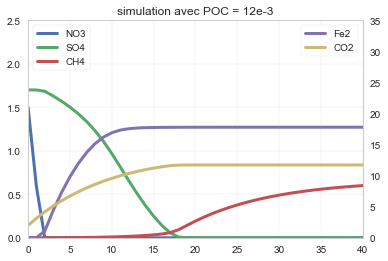

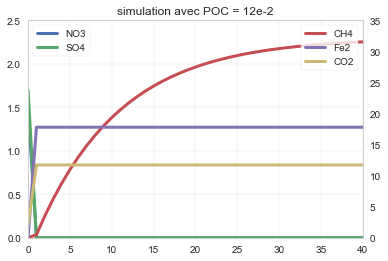

In [5]:
i=12e-5
j =-5
while(i<=12e-2):
#modifier le init_C pour init_conc puisque cet attribut de Batch semblait avoir été modifie
# ED
    bl.add_species(element='POC', init_conc=i)
    bl.add_species(element='CO2', init_conc=2e-3)
    bl.add_species(element='Fe2', init_conc=0)
    bl.add_species(element='CH4', init_conc=0)

# EA
    bl.add_species(element='NO3', init_conc=1.5e-3)
    bl.add_species(element='Fe3', init_conc=17.8e-3)
    bl.add_species(element='SO4', init_conc=1.7e-3)

# Henry law equilibrium:
    bl.add_species(element='CH4g', init_conc=0)
    bl.add_partition_equilibrium('CH4', 'CH4g', 1.4)

    bl.constants['Km_NO3'] = 0.001e-3
    bl.constants['Km_Fe3_surf'] = 2e-3
    bl.constants['Km_SO4'] = 0.3e-4
    bl.constants['k1'] = 0.1 / 24 / 60 / 60
    bl.constants['SA'] = 600
    bl.constants['ro_min'] = 3.84e-6
    bl.constants['MW_Fe3'] = 106.8
    bl.constants['Fe3_init'] = 17.8e-3
    bl.rates['r_NO3'] = 'k1 * POC * NO3 / (Km_NO3 + NO3)'
    bl.rates['r_Fe3'] = 'k1 * POC *Fe3 / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'
    bl.rates['r_SO4'] = 'k1 * POC * SO4 / (Km_SO4 + SO4) * Km_Fe3_surf / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'
    bl.rates['r_CH4'] = 'k1 * POC * Km_SO4 / (Km_SO4 + SO4) * Km_Fe3_surf / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'
    bl.dcdt['POC'] = '- r_NO3 - r_Fe3 - r_SO4 - r_CH4'
    bl.dcdt['NO3'] = '- 4 / 5 * r_NO3'
    bl.dcdt['Fe3'] = '- 4 * r_Fe3'
    bl.dcdt['Fe2'] = '4 * r_Fe3'
    bl.dcdt['SO4'] = '- 1 / 2 * r_SO4'
    bl.dcdt['CO2'] = '1 * (r_NO3 + r_Fe3 + r_SO4)'
    bl.dcdt['CH4'] = '1 / 2 * r_CH4'
    bl.solve()
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.NO3.concentration[0], c=sns.color_palette("deep", 10)[0], lw=3, label='NO3')
   
    ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.SO4.concentration[0], c=sns.color_palette("deep", 10)[1], lw=3, label='SO4')
    if (i==12e-2):
        ax2.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CH4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='CH4')
    else:
        ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CH4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='CH4')
        
    ax2.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.Fe2.concentration[0], c=sns.color_palette("deep", 10)[3], lw=3, label='Fe2')
   
    ax2.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CO2.concentration[0], c=sns.color_palette("deep", 10)[4], lw=3, label='CO2')

    ax2.grid(False)
    ax1.grid(lw=0.2)
    ax1.set_ylim(0, 2.5)
    ax1.set_xlim(0, 40)
    ax2.set_ylim(0, 35)
    ax1.legend(frameon=1, loc=2)
    ax2.legend(frameon=1, loc=1)
    plt.title('simulation avec POC = 12e{}'.format(j))
    i=i*10
    j += 1
